# SDLAB ASSIGNMENT 9 on California Housing Prices Dataset

## BY
### Vaibhav Jaiswal
### PRN : 17070122071
### CS-3
### Final Year CSE, 2017-2021
# 

## Problem Statement  : 

- ## Data analysis case study using R for data set using ML Algorithm


## Objectives 

1. Loading the dataset.
2. Cleaning the Dataset.
3. Summarizing the dataset.
	- Dimensions of the dataset.
	- Types of the attributes.
	- Peek at the data itself.
	- Levels of the class attribute.
	- Breakdown of the instances in each class.
	- Statistical summary of all attributes.

4. Visualizing the dataset.
   -  Two types of plot
         - Univariate plots to better understand each attribute.
         - Multivariate plots to better understand the relationships between attributes


5. Evaluating some algorithms.
   - Select the best model that is suited for your Dataset


6. Making some predictions.
   - Summarize the result in confusion matrix

# 1. Loading The Libraries and Dataset

In [1]:
packages <- c("readr", "ggplot2", "knitr", "tidyverse", "caret", "leaps","mice","scales","RColorBrewer","plotly",
              "nortest","lmtest","mapproj", "maps","ggmap","Cairo","GGally",
              "tidyverse","Hmisc","corrplot","ggcorrplot","ggplot2","xgboost","DiagrammeR")

install.packages(setdiff(packages, rownames(installed.packages())))  

In [2]:
suppressMessages(library(tidyverse))
suppressMessages(library(Hmisc))
suppressMessages(library(corrplot))
suppressMessages(library(ggcorrplot))
suppressMessages(library(plotly))
suppressMessages(library(GGally))
suppressMessages(library(scales))
suppressMessages(library(readr))
suppressMessages(library(ggplot2))
suppressMessages(library(knitr))
suppressMessages(library(caret))
suppressMessages(library(leaps))
suppressMessages(library(mice))
suppressMessages(library(RColorBrewer))
suppressMessages(library(nortest))
suppressMessages(library(lmtest))
suppressMessages(library(ggmap))
suppressMessages(library(mapproj))
suppressMessages(library(grid))
suppressMessages(library(DiagrammeR))
suppressMessages(library(xgboost))

In [3]:
# Reading the Dataset
data_housing <- read_csv("housing.csv")
data_housing = as.data.frame(data_housing)

Parsed with column specification:
cols(
  longitude = col_double(),
  latitude = col_double(),
  housing_median_age = col_double(),
  total_rooms = col_double(),
  total_bedrooms = col_double(),
  population = col_double(),
  households = col_double(),
  median_income = col_double(),
  median_house_value = col_double(),
  ocean_proximity = col_character()
)


# 2. Cleaning The Dataset 

## Firstly lets change the categorial variable from text to Factor

In [4]:
data_housing$ocean_proximity = as.factor(data_housing$ocean_proximity)
levels(data_housing$ocean_proximity)

[1] "<1H OCEAN"  "INLAND"     "ISLAND"     "NEAR BAY"   "NEAR OCEAN"

## lets take a deeper look into ocean proximity 

In [5]:
summary(data_housing$ocean_proximity)

<1H OCEAN     INLAND     ISLAND   NEAR BAY NEAR OCEAN 
      9136       6551          5       2290       2658

## since island only has 5 rows , we can drop it to prevent it from skewing our model performance

In [6]:
data_housing = data_housing[data_housing$ocean_proximity != "ISLAND", ]

## Handle Missing Data

In [7]:
i <- 1
for(column in names(data_housing)){
    print(paste(column,"----> ",sum(is.na(data_housing[,i]))))
    i <- i+1 
}

[1] "longitude ---->  5"
[1] "latitude ---->  0"
[1] "housing_median_age ---->  0"
[1] "total_rooms ---->  0"
[1] "total_bedrooms ---->  207"
[1] "population ---->  0"
[1] "households ---->  0"
[1] "median_income ---->  0"
[1] "median_house_value ---->  0"
[1] "ocean_proximity ---->  0"


## As you can see total bedrooms has missing values 

In [8]:
total_bedrooms = data_housing$total_bedrooms
sum(is.na(total_bedrooms))

[1] 207

### There are 207 observations with missing data for total_bedrooms. One thing we can do to solve this issue of NA values in total_bedrooms is to impute data points. Lets fill these values with median imputation

In [9]:
bedroom_mean = mean(data_housing$total_bedrooms, na.rm=TRUE)
bedroom_median = median(data_housing$total_bedrooms, na.rm=TRUE)
data_housing$total_bedrooms[is.na(data_housing$total_bedrooms)] = bedroom_median
data_housing2 <- data_housing

# 3. Summarizing the Dataset

### Dimensions of dataset

In [10]:
paste("Rows in the dataset : ", nrow(data_housing))
paste("Columns in the dataset : ", ncol(data_housing))

[1] "Rows in the dataset :  20635"

[1] "Columns in the dataset :  10"

### Types of attributes

In [11]:
str(data_housing)

'data.frame':	20635 obs. of  10 variables:
 $ longitude         : num  -122 -122 -122 -122 -122 ...
 $ latitude          : num  37.9 37.9 37.9 37.9 37.9 ...
 $ housing_median_age: num  41 21 52 52 52 52 52 52 42 52 ...
 $ total_rooms       : num  880 7099 1467 1274 1627 ...
 $ total_bedrooms    : num  129 1106 190 235 280 ...
 $ population        : num  322 2401 496 558 565 ...
 $ households        : num  126 1138 177 219 259 ...
 $ median_income     : num  8.33 8.3 7.26 5.64 3.85 ...
 $ median_house_value: num  452600 358500 352100 341300 342200 ...
 $ ocean_proximity   : Factor w/ 5 levels "<1H OCEAN","INLAND",..: 4 4 4 4 4 4 4 4 4 4 ...
 - attr(*, "spec")=
  .. cols(
  ..   longitude = col_double(),
  ..   latitude = col_double(),
  ..   housing_median_age = col_double(),
  ..   total_rooms = col_double(),
  ..   total_bedrooms = col_double(),
  ..   population = col_double(),
  ..   households = col_double(),
  ..   median_income = col_double(),
  ..   median_house_value = col_doub

### Take a look at dataset

In [12]:
# Lets check the dataset 
data_housing[1:15,]

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY
-122.25,37.84,52,2535,489,1094,514,3.6591,299200,NEAR BAY
-122.25,37.84,52,3104,687,1157,647,3.1200,241400,NEAR BAY
-122.26,37.84,42,2555,665,1206,595,2.0804,226700,NEAR BAY
-122.25,37.84,52,3549,707,1551,714,3.6912,261100,NEAR BAY


### Levels of class attribute

In [13]:
levels(data_housing$ocean_proximity)

[1] "<1H OCEAN"  "INLAND"     "ISLAND"     "NEAR BAY"   "NEAR OCEAN"

In [14]:
summary(data_housing$ocean_proximity)

<1H OCEAN     INLAND     ISLAND   NEAR BAY NEAR OCEAN 
      9136       6551          0       2290       2658

### Statistical summary of all attributes

In [15]:
print(summary(data_housing))

   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
 NA's   :5                                                          
 total_bedrooms     population      households     median_income    
 Min.   :   1.0   Min.   :    3   Min.   :   1.0   Min.   : 0.4999  
 1st Qu.: 297.0   1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5631  
 Median : 435.0   Median : 1166   Median : 409.0   Median : 3.5352  
 Mean   : 536.9   Mean   : 1426   Mean   : 499.6   Mean   : 3.8709  
 3rd Qu.: 644.0   3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7437  
 Max.   :6445.0   Max.   :35682   

# 4. Vizualization

## 4.1 Univariate

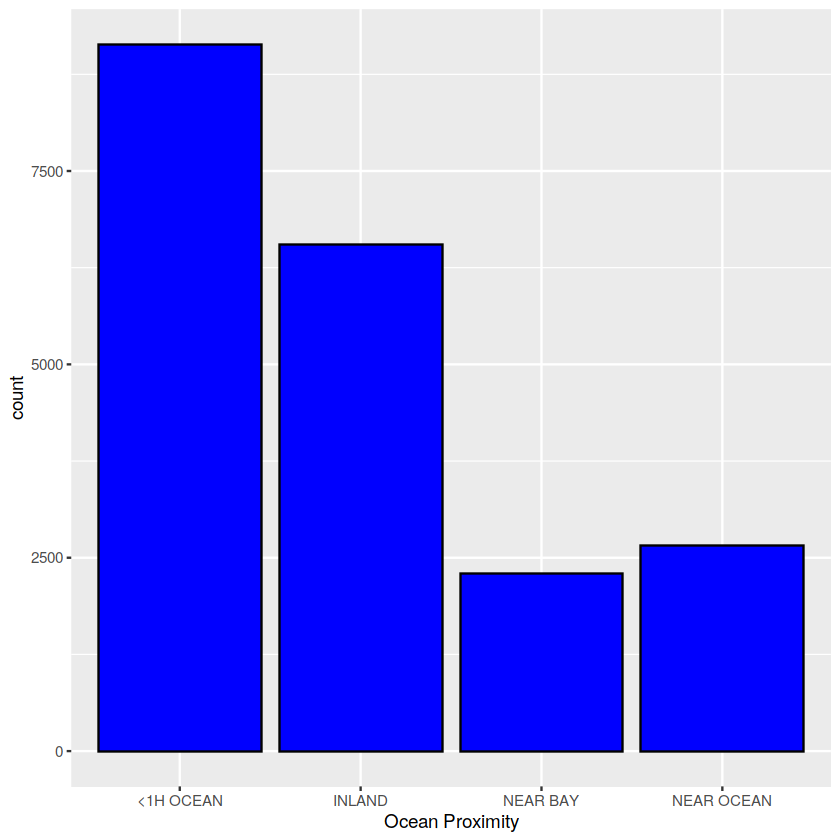

In [16]:
ggplot(data_housing, aes(x = factor(ocean_proximity))) +
    geom_bar(stat = "count", color = "black", fill = "blue") +
    xlab("Ocean Proximity")

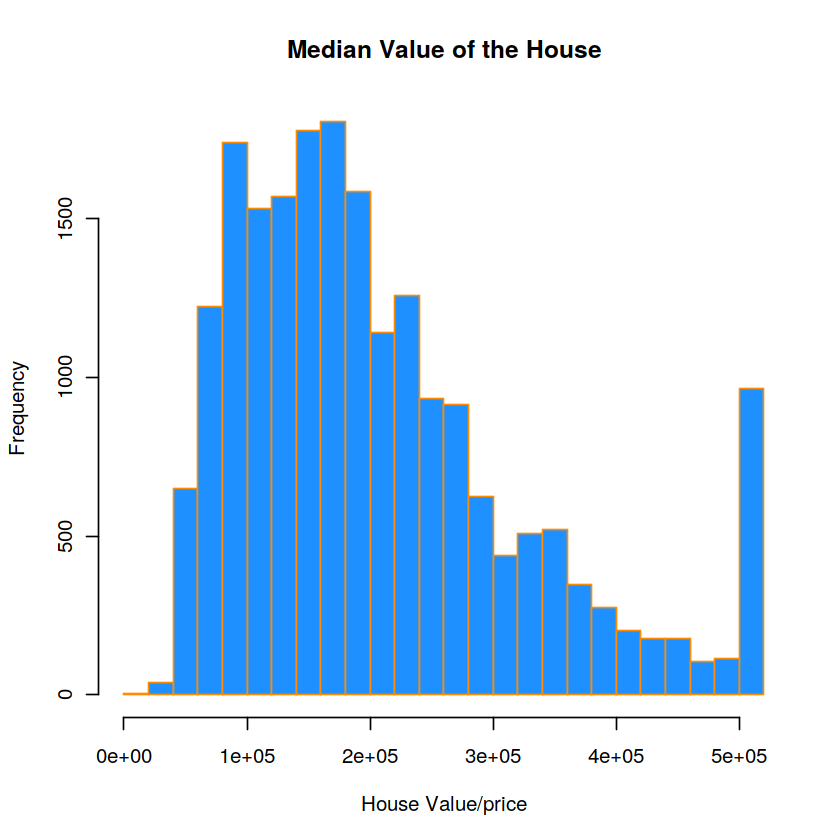

In [17]:
hist(data_housing$median_house_value, breaks = 20, main = "Median Value of the House",xlab="House Value/price", border="darkorange", col="dodgerblue")

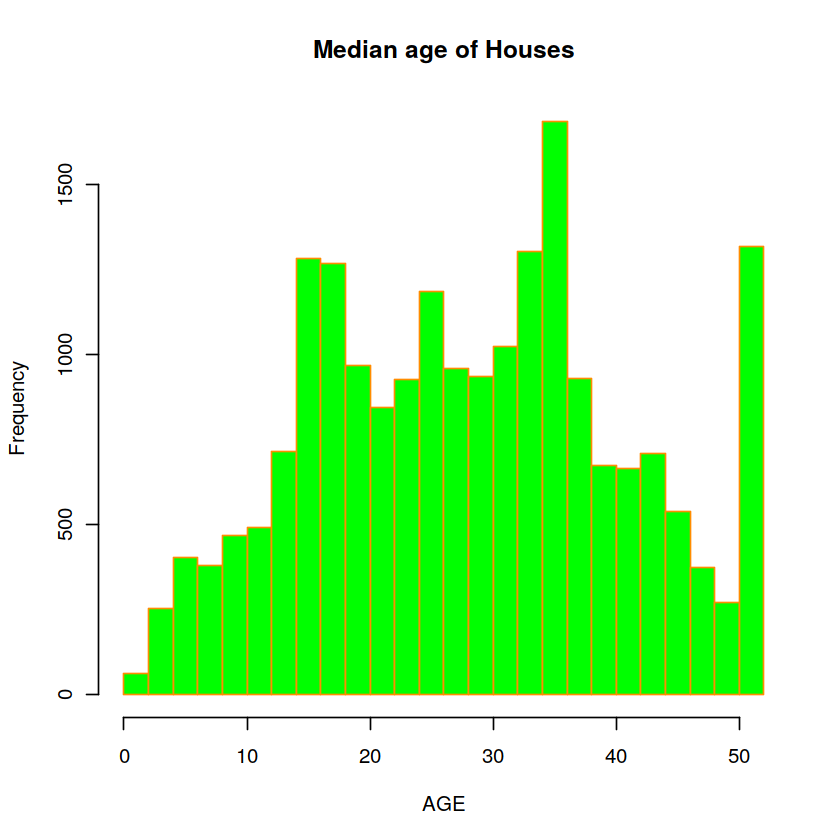

In [18]:
hist(data_housing$housing_median_age, breaks = 20, main = "Median age of Houses",xlab = "AGE", border="darkorange", col="green")


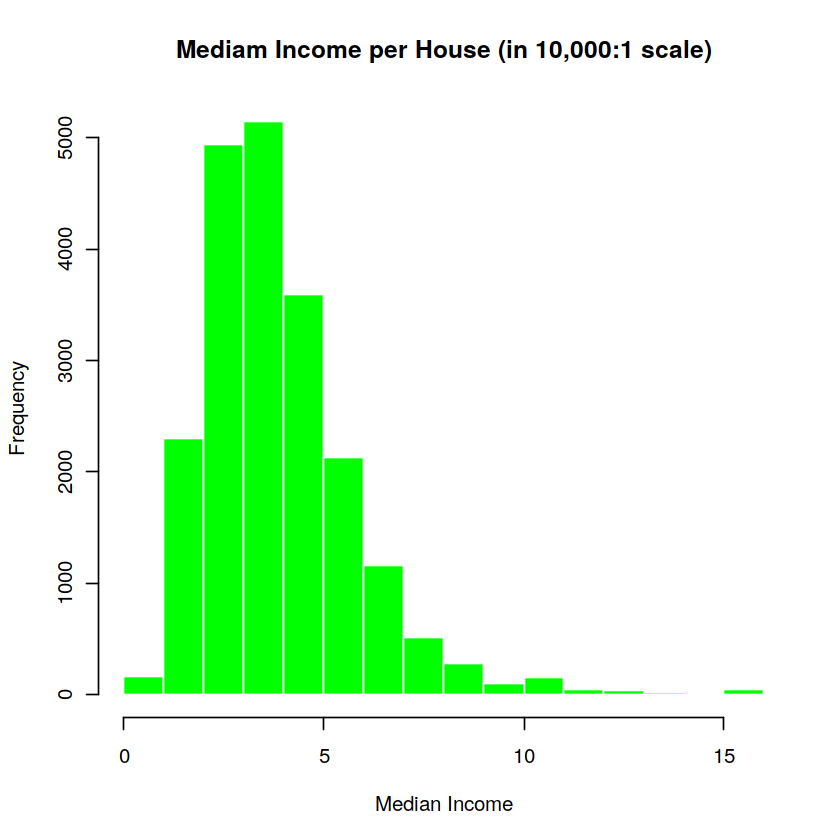

In [19]:
hist(data_housing$median_income, breaks = 20, main = "Mediam Income per House (in 10,000:1 scale)",xlab="Median Income" ,border="white", col="green")


## Bivariate Analysis

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


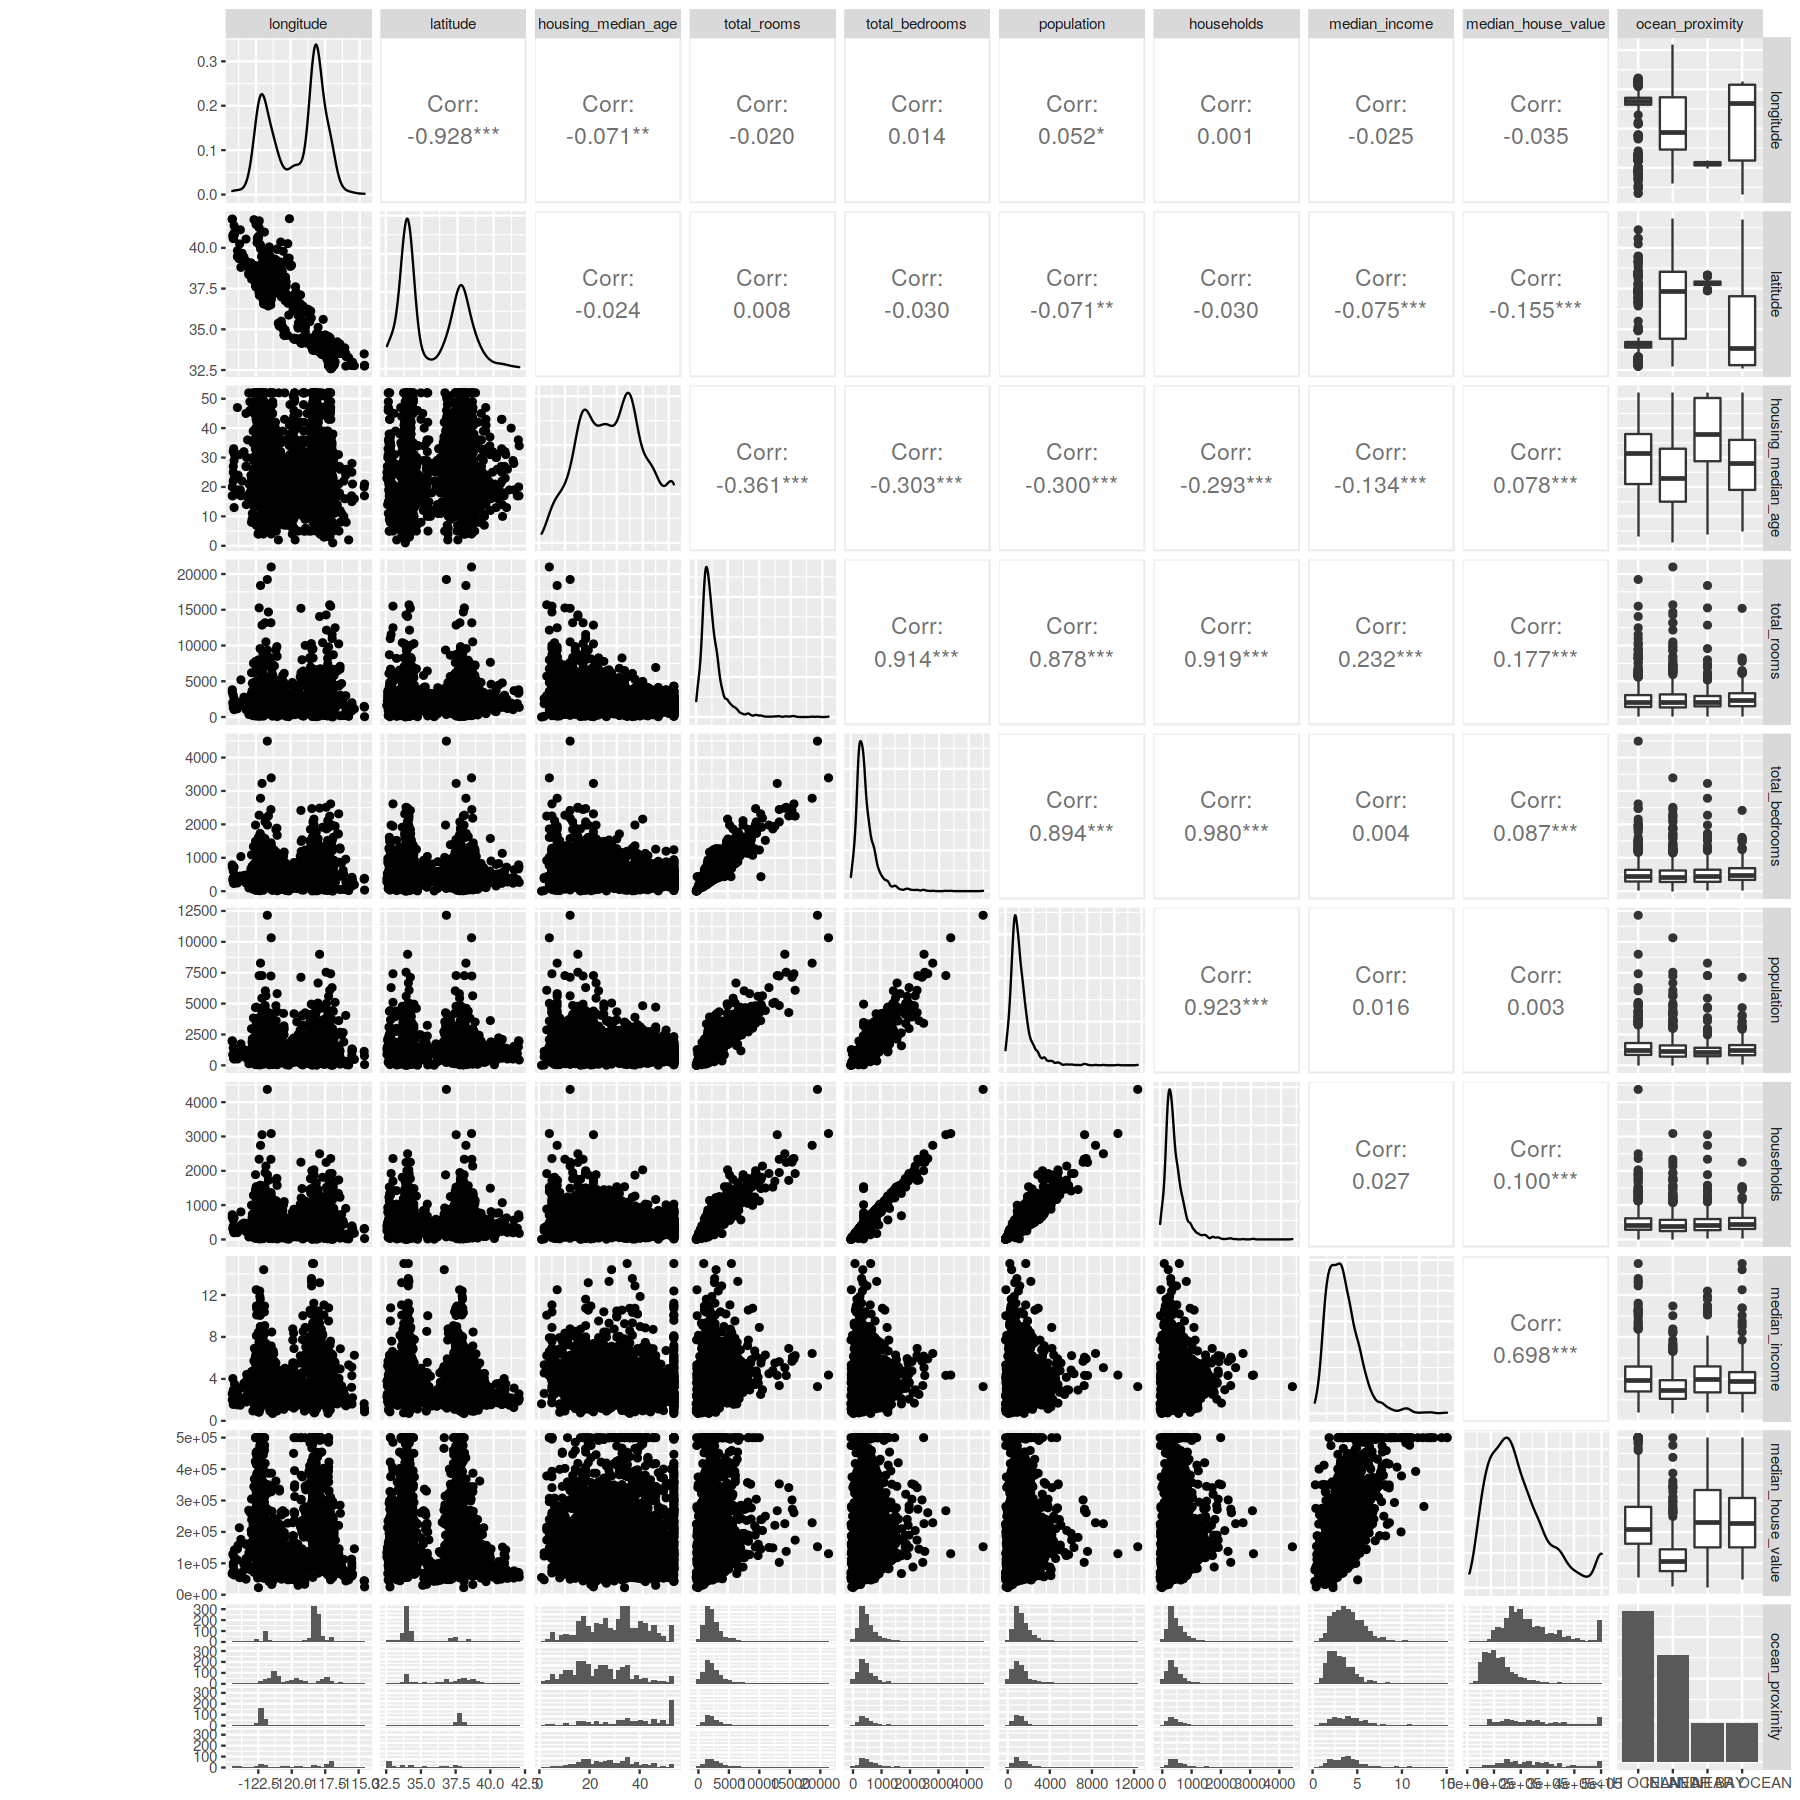

In [20]:
options(repr.plot.width=15, repr.plot.height=15)
data_housing_sample <- data_housing[sample(1:length(data_housing$median_house_value), 2000), ]
ggpairs(data_housing_sample,upper = list(continuous = wrap("cor", size = 4.75, align_percent = 1)))

Warning message:
“Removed 5 rows containing missing values (geom_point).”

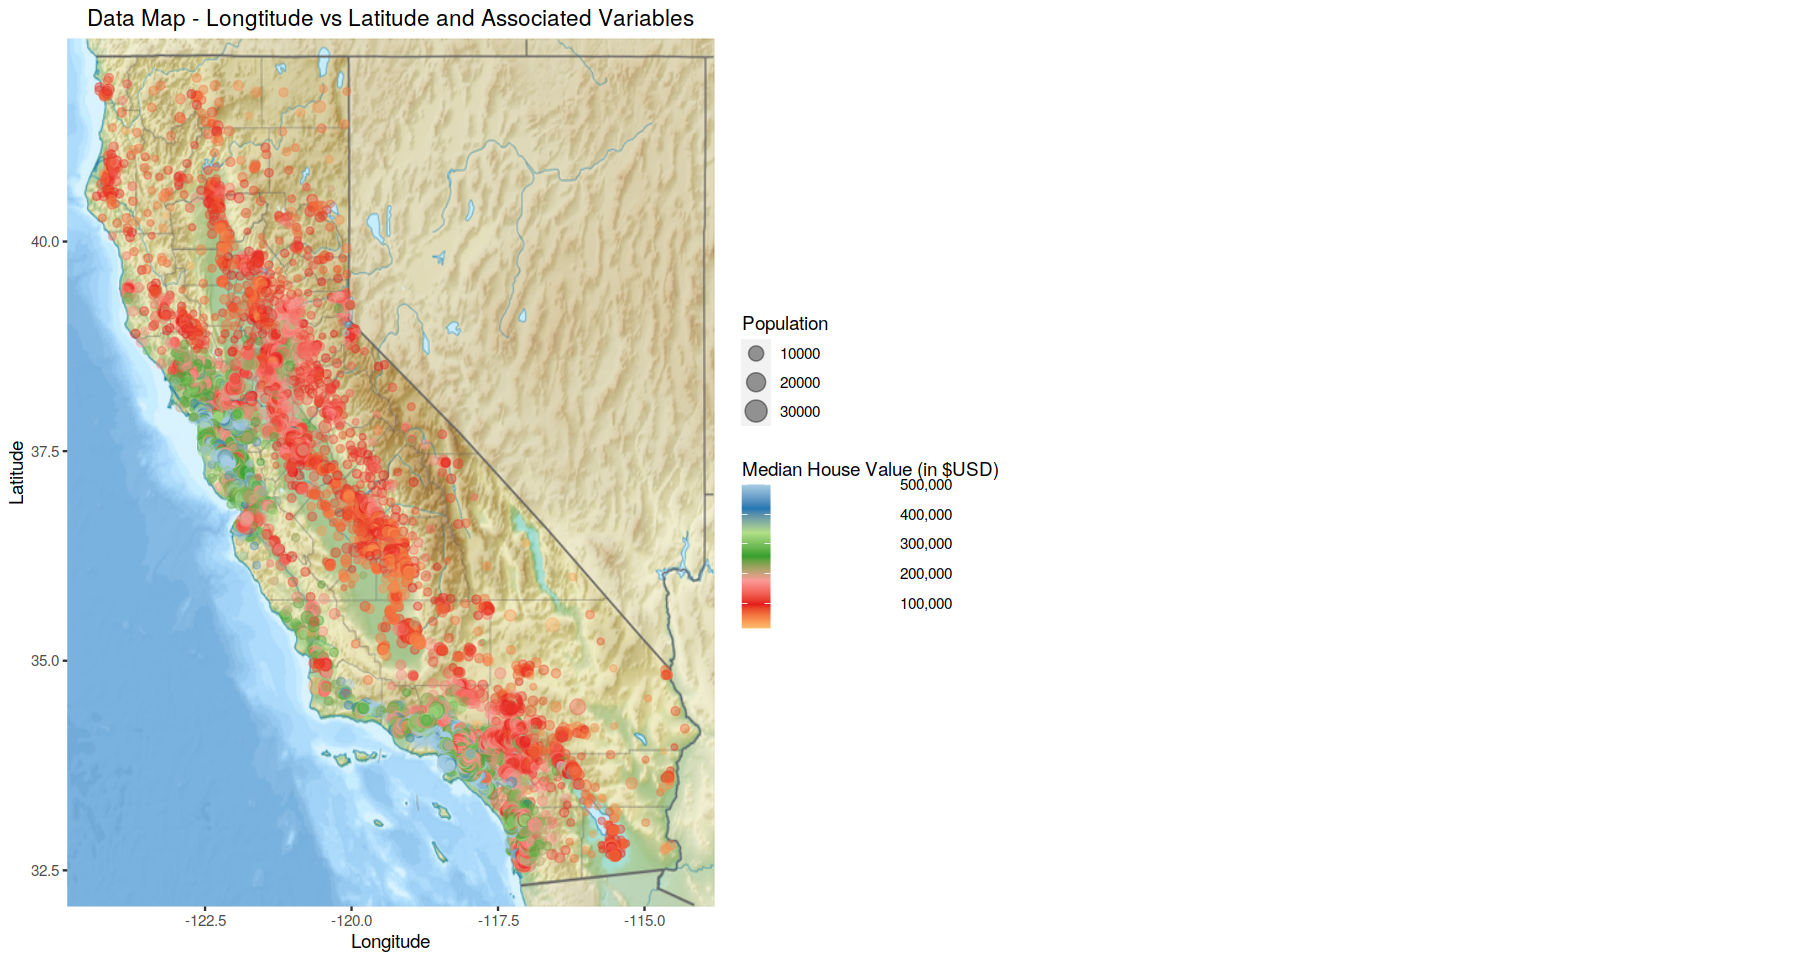

In [21]:
options(repr.plot.width=15, repr.plot.height=8)

california_image <- png::readPNG("Relief_map_of_California.png")
plot_map = ggplot(data_housing, 
                  aes(x = longitude, y = latitude, color = median_house_value, 
                      hma = housing_median_age, tr = total_rooms, tb = total_bedrooms,
                      hh = households, mi = median_income)) +
              annotation_custom(rasterGrob(california_image, width = unit(1,"npc"), height = unit(1,"npc")),-Inf, Inf, -Inf, Inf)+
              geom_point(aes(size = population), alpha = 0.4) +
              xlab("Longitude") +
              ylab("Latitude") +
              ggtitle("Data Map - Longtitude vs Latitude and Associated Variables") +
              theme(plot.title = element_text(hjust = 0.5)) +
              scale_color_distiller(palette = "Paired", labels = comma) +
              labs(color = "Median House Value (in $USD)", size = "Population")
plot_map

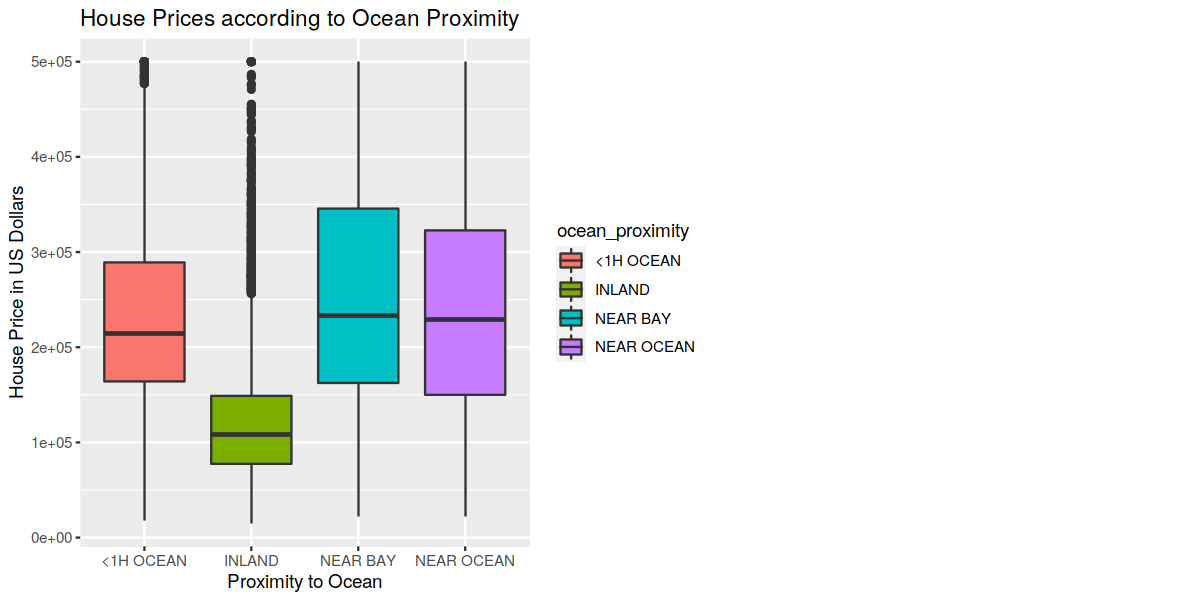

In [22]:
options(repr.plot.width=10, repr.plot.height=5)
ggplot(data_housing, aes(factor(ocean_proximity), median_house_value, fill=ocean_proximity)) +
                    geom_boxplot() + 
                    ggtitle("House Prices according to Ocean Proximity") +
                    xlab("Proximity to Ocean") +
                    ylab("House Price in US Dollars")

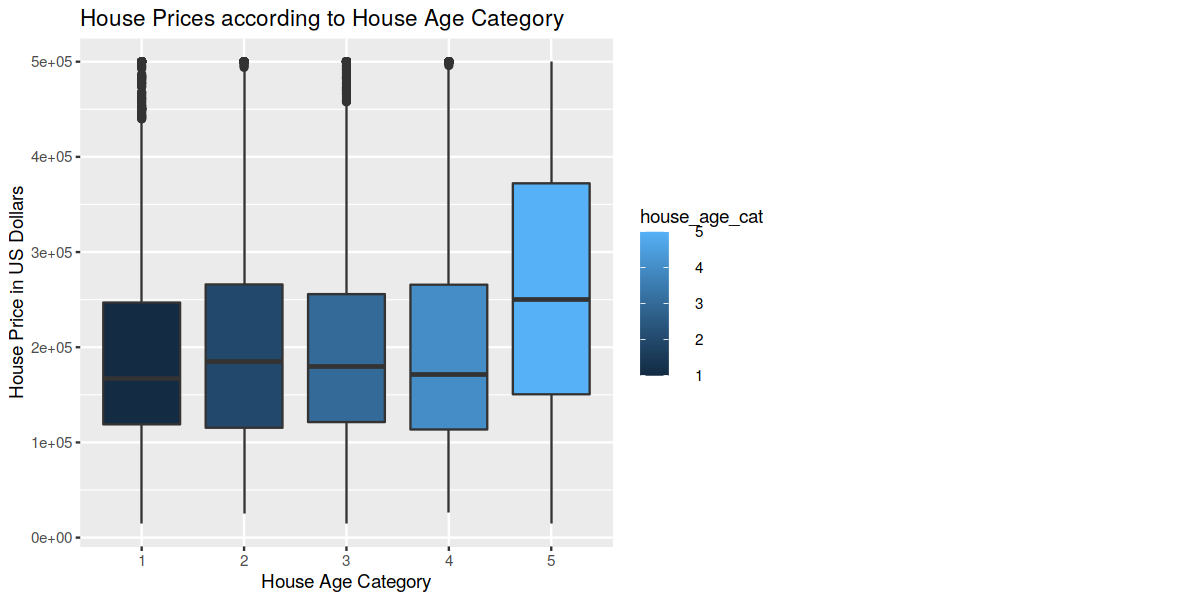

In [23]:
data_housing$house_age_cat <- ifelse(data_housing$housing_median_age>=50, 5, 
                            ifelse(data_housing$housing_median_age>=40,4, 
                            ifelse(data_housing$housing_median_age>=30,3,
                            ifelse(data_housing$housing_median_age>=20,2,
                            1))))

options(repr.plot.width=10, repr.plot.height=5)
ggplot(data_housing, aes(factor(house_age_cat), median_house_value, fill=house_age_cat)) +
                     geom_boxplot() +
                     ggtitle("House Prices according to House Age Category") +
                     xlab("House Age Category") +
                     ylab("House Price in US Dollars")

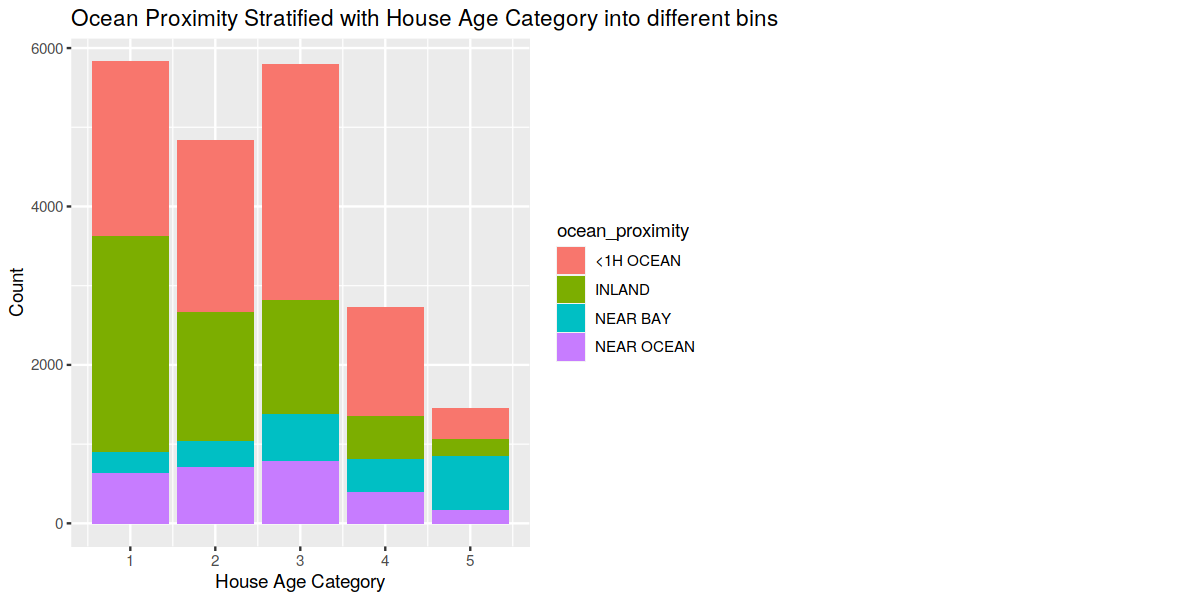

In [24]:
ggplot(data = data_housing) + geom_bar(mapping = aes(x =house_age_cat , fill = ocean_proximity)) + 
                              ggtitle("Ocean Proximity Stratified with House Age Category into different bins") + 
                              xlab("House Age Category") + 
                              ylab("Count")

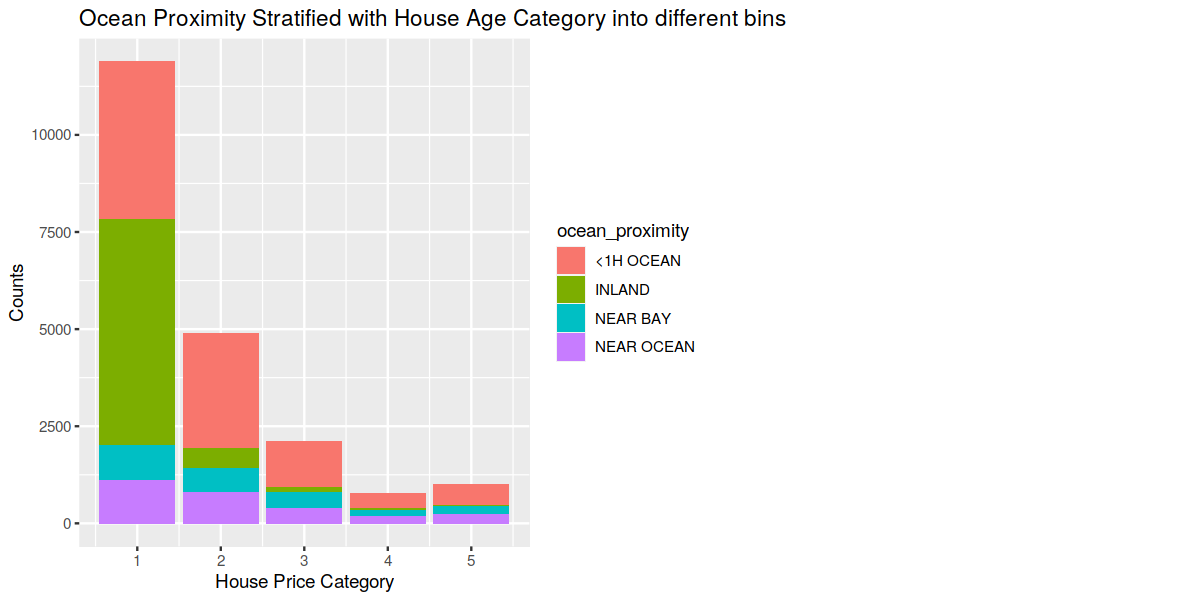

In [25]:
data_housing$house_price_category <- ifelse(data_housing$median_house_value>=500000, 5, 
                            ifelse(data_housing$median_house_value>=400000,4, 
                            ifelse(data_housing$median_house_value>=300000,3,
                            ifelse(data_housing$median_house_value>=200000,2,
                            1))))


ggplot(data = data_housing) + geom_bar(mapping = aes(x =house_price_category , fill = ocean_proximity)) + 
                              ggtitle("Ocean Proximity Stratified with House Age Category into different bins") +
                              xlab("House Price Category") +
                              ylab("Counts")

## Correlation Analysis

In [26]:
#Encode the Factor Varialble 
data_housing2$ocean_proximity <- as.numeric(factor(data_housing2$ocean_proximity, 
                                                  levels = c('INLAND','<1H OCEAN','NEAR BAY','NEAR OCEAN','ISLAND'), 
                                                  exclude = NULL))

pearson_corr_matrix <- rcorr(as.matrix(data_housing2), type = c("pearson"))
print(pearson_corr_matrix$r)

                     longitude    latitude housing_median_age total_rooms
longitude           1.00000000 -0.92466266        -0.10815607  0.04451507
latitude           -0.92466266  1.00000000         0.01146179 -0.03623061
housing_median_age -0.10815607  0.01146179         1.00000000 -0.36126842
total_rooms         0.04451507 -0.03623061        -0.36126842  1.00000000
total_bedrooms      0.06916594 -0.06656534        -0.31906133  0.92706032
population          0.09981900 -0.10897848        -0.29617220  0.85711744
households          0.05538223 -0.07119864        -0.30286285  0.91848029
median_income      -0.01553716 -0.07997657        -0.11894871  0.19799118
median_house_value -0.04647896 -0.14383687         0.10527182  0.13437325
ocean_proximity    -0.09524570 -0.16345199         0.21118151 -0.02609490
                   total_bedrooms   population  households median_income
longitude             0.069165937  0.099819001  0.05538223  -0.015537156
latitude             -0.066565342 -0.108

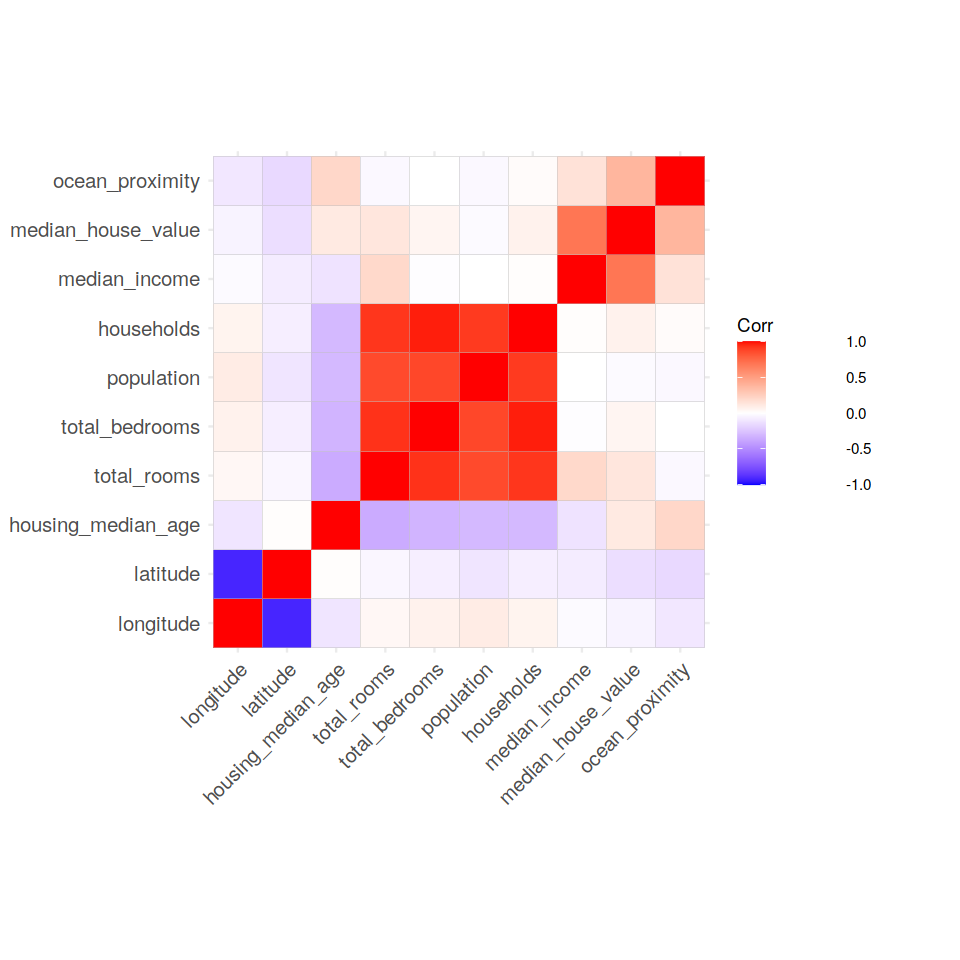

In [27]:
# Lets make a correlation plot 
options(repr.plot.width=8, repr.plot.height=8)
ggcorrplot(pearson_corr_matrix$r)

# 5. Model Building and Evaluation

In [28]:
# to predict median_house_value  longitude latitude wont help in model
# removing longitude and latitude
data_housing2 = subset(data_housing2 , select=-c(longitude,latitude))
colnames(data_housing2)

[1] "housing_median_age" "total_rooms"        "total_bedrooms"    
[4] "population"         "households"         "median_income"     
[7] "median_house_value" "ocean_proximity"

## Test Train Split

In [29]:
# splitting into train and test
set.seed(420)
data_housing_scaled <- data_housing2

train = sample(1:nrow(data_housing_scaled) , size = 0.8*nrow(data_housing_scaled))
data_train = data_housing_scaled[train,]
data_test = data_housing_scaled[-train,]
print(paste("Number of Rows in Dataset : ", nrow(data_housing_scaled)))
print(paste("Number of Rows in Train Dataset : ", nrow(data_train)))
print(paste("Number of Rows in Test Dataset : ", nrow(data_test)))

[1] "Number of Rows in Dataset :  20635"
[1] "Number of Rows in Train Dataset :  16508"
[1] "Number of Rows in Test Dataset :  4127"


## Lets Create a Multiple Linear Regression Model

In [30]:
#lets make a linear regression model on train data

model_multiple_linear_reg = lm(median_house_value~., data = data_train)

summary(model_multiple_linear_reg)


Call:
lm(formula = median_house_value ~ ., data = data_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-582054  -43707  -11352   30948  611381 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -6.913e+04  2.445e+03  -28.27   <2e-16 ***
housing_median_age  1.404e+03  4.941e+01   28.42   <2e-16 ***
total_rooms        -1.222e+01  8.671e-01  -14.10   <2e-16 ***
total_bedrooms      6.379e+01  6.934e+00    9.20   <2e-16 ***
population         -3.138e+01  1.220e+00  -25.72   <2e-16 ***
households          1.105e+02  7.760e+00   14.24   <2e-16 ***
median_income       4.377e+04  3.701e+02  118.28   <2e-16 ***
ocean_proximity     2.617e+04  6.177e+02   42.36   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 72430 on 16500 degrees of freedom
Multiple R-squared:  0.606,	Adjusted R-squared:  0.6058 
F-statistic:  3625 on 7 and 16500 DF,  p-value: < 2.2e-16


# 6. Make predictions and Evaluate the Model

In [31]:
pred_mlr = predict(model_multiple_linear_reg , data_test)

In [32]:
d = data_test$median_house_value-pred_mlr
mse = mean((d)^2)
mae = mean(abs(d))
rmse = sqrt(mse)
R2 = 1-(sum((d)^2)/sum((data_test$median_house_value-mean(data_test$median_house_value))^2))

cat("Evaluation Metrics of MLR model ","\n",
    "MAE:", mae, "\n", 
    "MSE:", mse, "\n", 
    "RMSE:", rmse, "\n", 
    "R-squared:", R2)

Evaluation Metrics of MLR model  
 MAE: 51595.53 
 MSE: 5035838918 
 RMSE: 70963.65 
 R-squared: 0.6218808

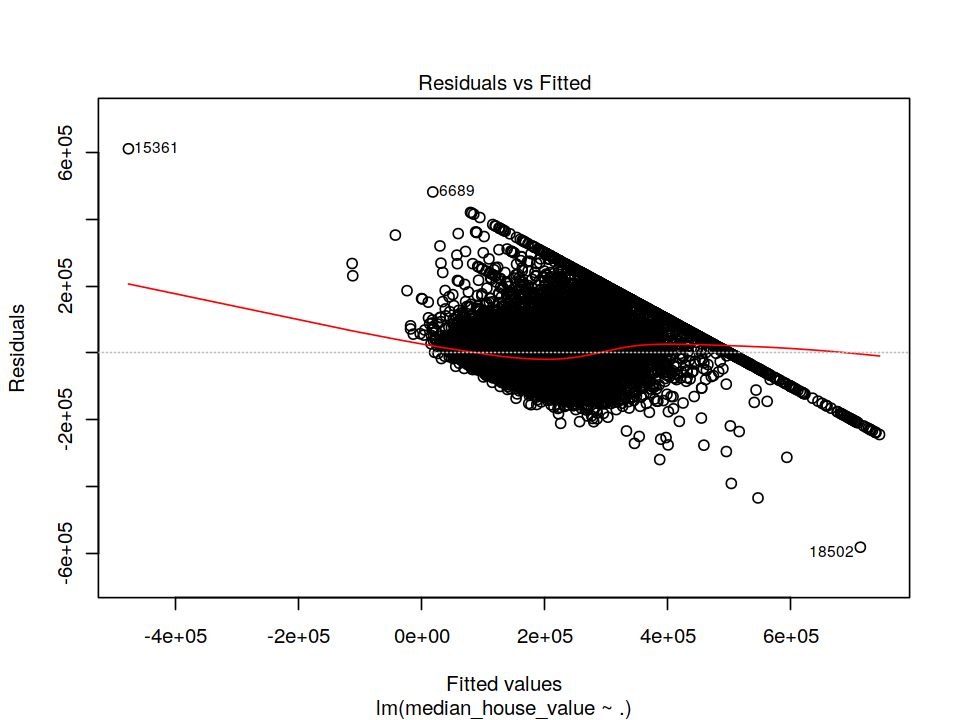

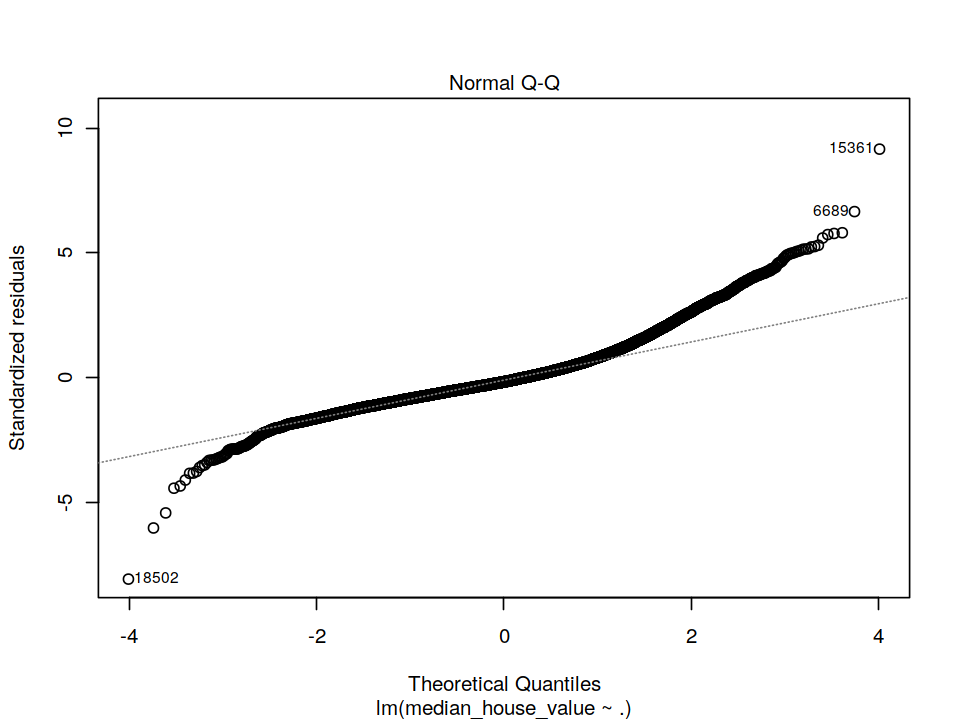

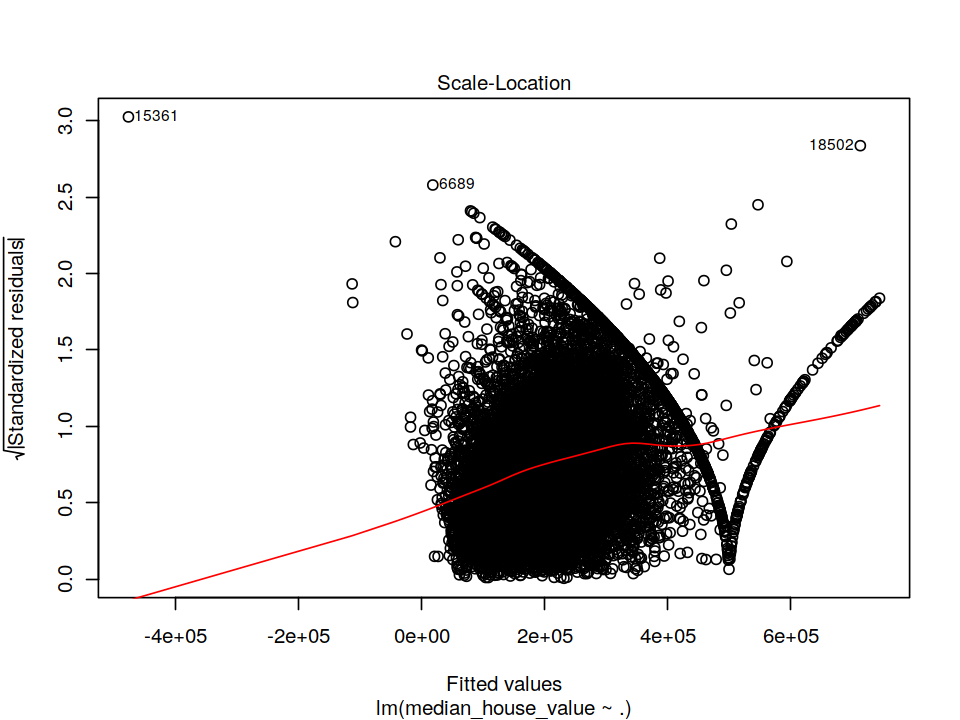

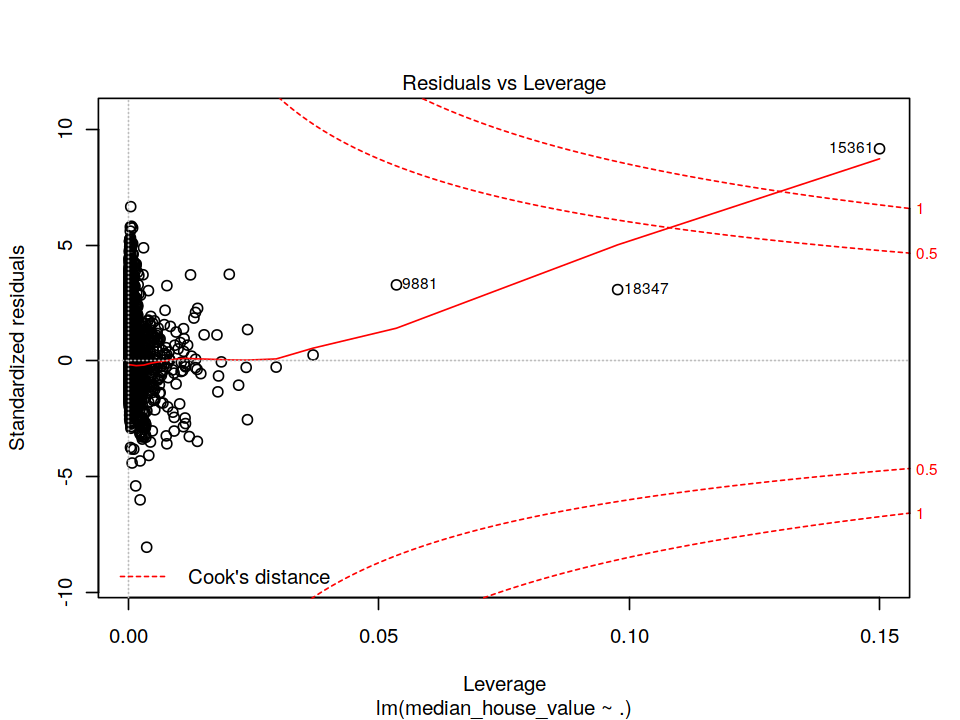

In [33]:
options(repr.plot.width=8, repr.plot.height=6)
plot(model_multiple_linear_reg)

# XGBOOST Model 

## Splitting Data and creating test train sets

In [34]:
xgb_data_train_x = data.matrix(data_train[,-7])
xgb_data_train_y = data_train[,7]

xgb_data_test_x = data.matrix(data_test[,-7])
xgb_data_test_y = data_test[,7]
                          
xgb_train = xgb.DMatrix(data = xgb_data_train_x, label = xgb_data_train_y)
xgb_test = xgb.DMatrix(data = xgb_data_test_x, label = xgb_data_test_y)

## Training Model

In [35]:
model_xgb = xgboost(data = xgb_train, max.depth = 5, nrounds = 100)
print(model_xgb)

[1]	train-rmse:173433.078125 
[2]	train-rmse:131208.859375 
[3]	train-rmse:104063.804688 
[4]	train-rmse:87305.335938 
[5]	train-rmse:77445.203125 
[6]	train-rmse:71392.164062 
[7]	train-rmse:67857.648438 
[8]	train-rmse:65585.289062 
[9]	train-rmse:63675.937500 
[10]	train-rmse:62498.617188 
[11]	train-rmse:61490.429688 
[12]	train-rmse:60757.011719 
[13]	train-rmse:60037.011719 
[14]	train-rmse:59488.125000 
[15]	train-rmse:58847.281250 
[16]	train-rmse:58491.707031 
[17]	train-rmse:57927.160156 
[18]	train-rmse:57651.550781 
[19]	train-rmse:57289.507812 
[20]	train-rmse:56953.281250 
[21]	train-rmse:56662.835938 
[22]	train-rmse:56323.648438 
[23]	train-rmse:55972.761719 
[24]	train-rmse:55854.992188 
[25]	train-rmse:55616.730469 
[26]	train-rmse:55358.750000 
[27]	train-rmse:55225.902344 
[28]	train-rmse:54981.042969 
[29]	train-rmse:54750.453125 
[30]	train-rmse:54550.019531 
[31]	train-rmse:54382.835938 
[32]	train-rmse:54327.425781 
[33]	train-rmse:54234.656250 
[34]	train-rmse:

## Training Model

In [36]:
xgb_pred_y = predict(model_xgb, xgb_test)

## Evaluation XGBOOST MODEL

In [37]:

mse = mean((xgb_data_test_y - xgb_pred_y)^2)
mae = caret::MAE(xgb_data_test_y, xgb_pred_y)
rmse = caret::RMSE(xgb_data_test_y, xgb_pred_y)

cat("Evaluation Metrics of XGBOOST model ","\n",
    "MAE:", mae, "\n", 
    "MSE:", mse, "\n", 
    "RMSE:", rmse, "\n")

Evaluation Metrics of XGBOOST model  
 MAE: 42111.36 
 MSE: 3549219812 
 RMSE: 59575.33 


## Plot predicted and actual lines 

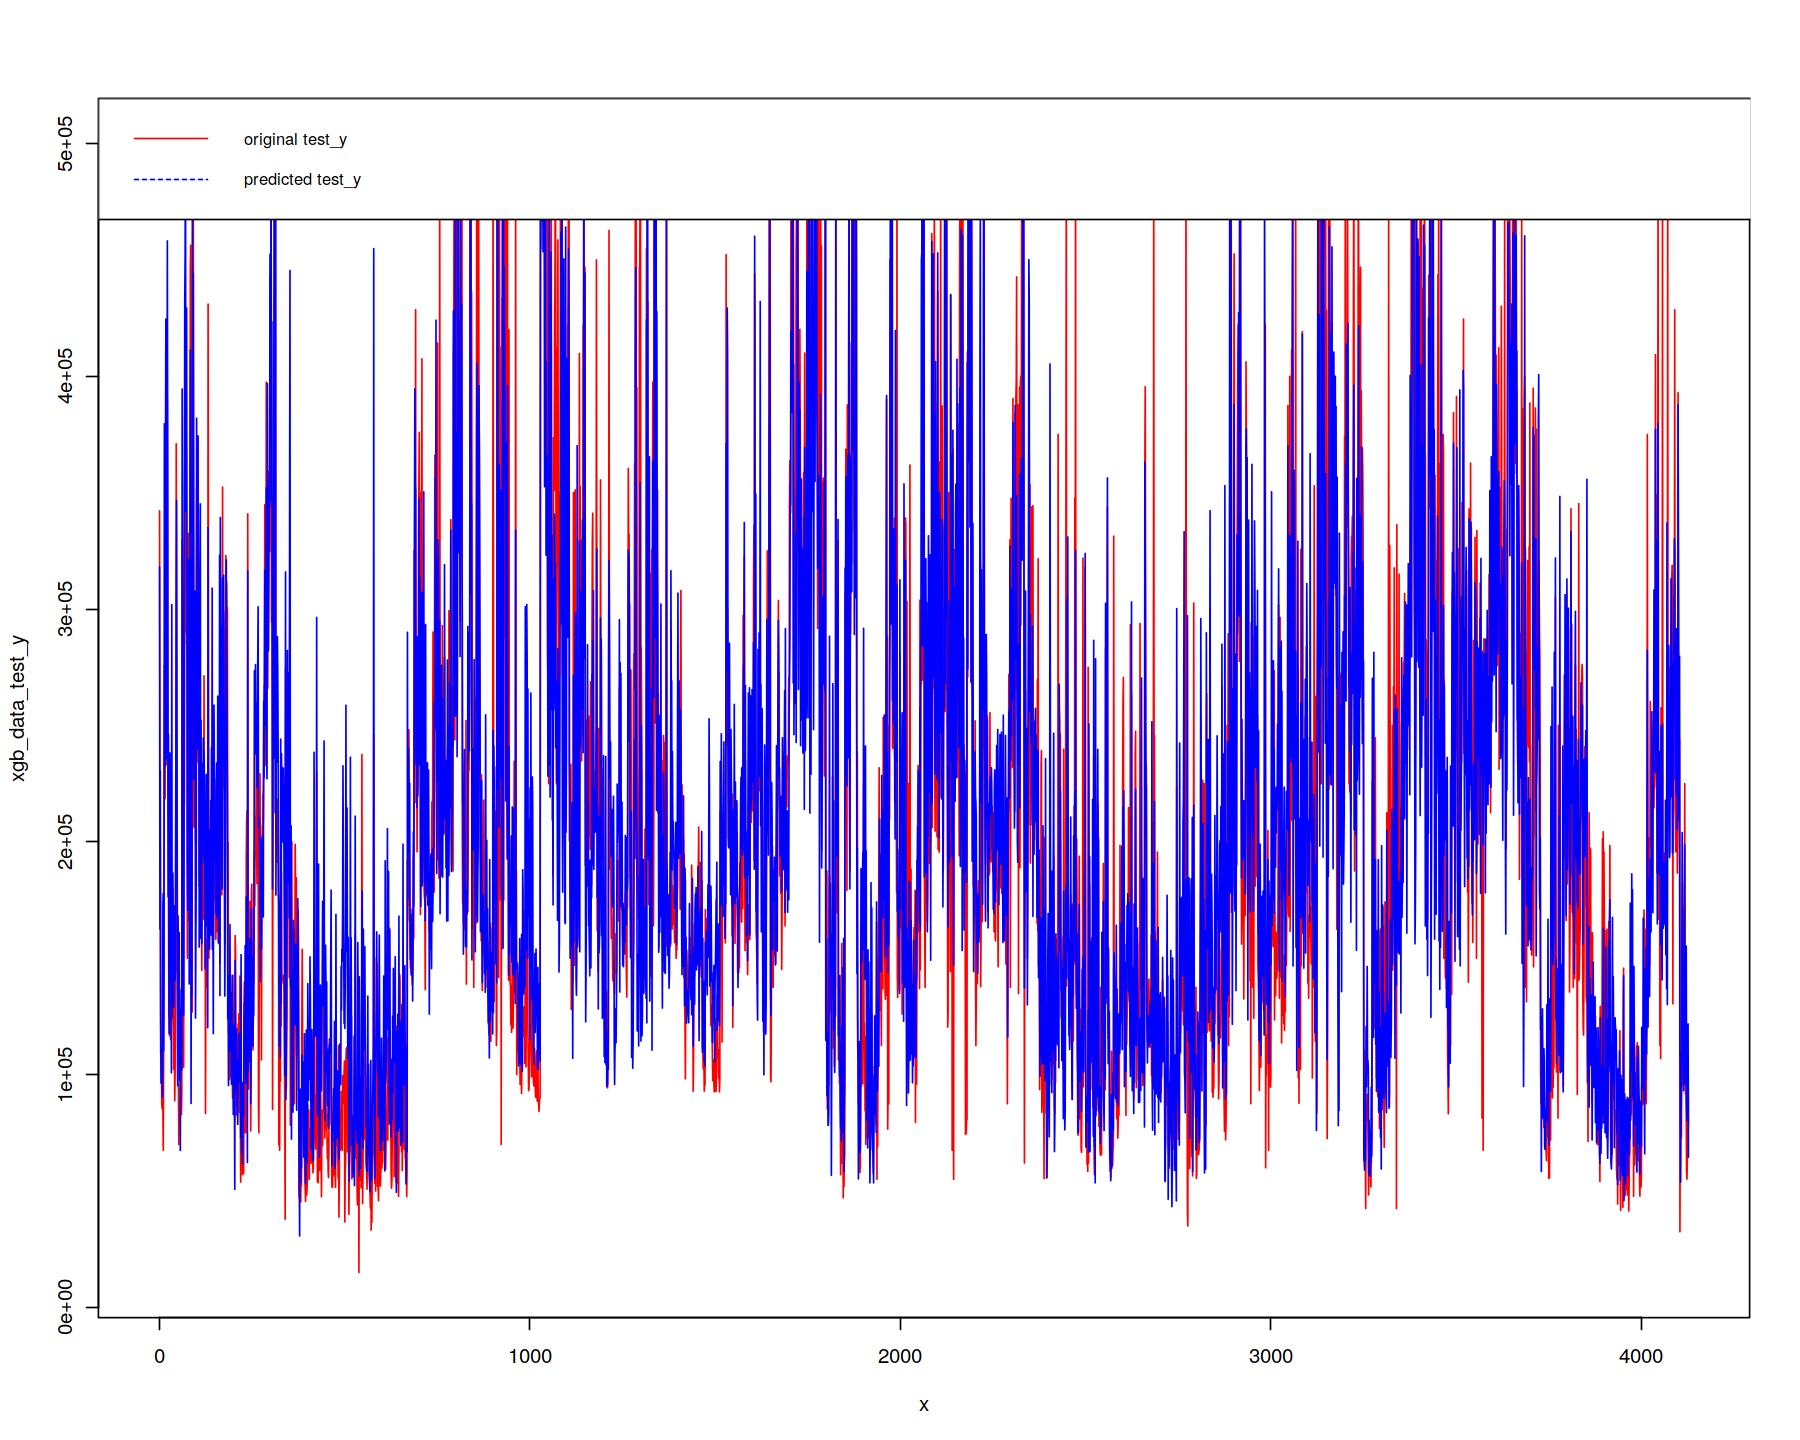

In [38]:
x = 1:length(xgb_data_test_y)
options(repr.plot.width=15, repr.plot.height=12)
plot(x, xgb_data_test_y, col = "red", type = "l")
lines(x, xgb_pred_y, col = "blue", type = "l")
legend("topleft", legend = c("original test_y", "predicted test_y"), 
       col = c("red", "blue"),  lty = 1:2,cex = 0.8 )

# Conclusion

- ## Via This Assignment we have learned how to work on a data science case study from start to end using R programming language and how to perform various Machine Learning Algorithms in R language

##                                --------------- END OF ASSIGNMENT ---------------